In [6]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import gzip as gz
import pysam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
from joblib import Parallel, delayed
import sys
import argparse
import plotly.express as px
import plotly.io as pio
import os
from Bio.Seq import Seq
from Bio import SeqIO
import swifter
import sys
import plotly.express as px
from Levenshtein import distance
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import scipy.stats as sts
import gzip as gz
import pysam
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
from joblib import Parallel, delayed
import sys
import argparse
import plotly.express as px
import plotly.io as pio
import os
from Bio.Seq import Seq
from Bio import SeqIO
import swifter
import sys
import plotly.express as px
from Levenshtein import distance
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
# import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
import svgwrite
pd.options.mode.chained_assignment = None  # Turns off the warning


In [2]:
df = pd.read_parquet("CHANGEseqR.mis6.parquet")

In [3]:
df

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13252726,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTCAGGGTTATGGATTTTTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[10, 16, 18, 20]",18,18,C,T,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTTTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG
13252730,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTGAGGGTTATGGATTTCTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[3, 10, 16, 20]",3,3,C,G,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTGAGGGTTATGGATTTCTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG
13252732,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTCAGGGTTATGGCTTTCTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[10, 14, 16, 20]",14,14,A,C,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGCTTTCTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG
13252734,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTCAGGGTTAAGGATTTCTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[10, 11, 16, 20]",11,11,T,A,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTAAGGATTTCTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG


In [4]:
df = df[df.MM<=3]

In [5]:
df

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13252726,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTCAGGGTTATGGATTTTTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[10, 16, 18, 20]",18,18,C,T,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTTTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG
13252730,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTGAGGGTTATGGATTTCTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[3, 10, 16, 20]",3,3,C,G,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTGAGGGTTATGGATTTCTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG
13252732,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTCAGGGTTATGGCTTTCTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[10, 14, 16, 20]",14,14,A,C,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGCTTTCTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG
13252734,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTCAGGGTTAAGGATTTCTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[10, 11, 16, 20]",11,11,T,A,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTAAGGATTTCTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG


In [11]:

mm_scores={'rU:dT,12': 0.8, 'rU:dT,13': 0.692307692, 'rU:dC,5': 0.64, 'rG:dA,14': 0.26666666699999997, 'rG:dG,19': 0.448275862, 'rG:dG,18': 0.47619047600000003, 'rG:dG,15': 0.272727273, 'rG:dG,14': 0.428571429, 'rG:dG,17': 0.235294118, 'rG:dG,16': 0.0, 'rC:dC,20': 0.058823529000000006, 'rG:dT,20': 0.9375, 'rG:dG,13': 0.42105263200000004, 'rG:dG,12': 0.529411765, 'rU:dC,6': 0.571428571, 'rU:dG,14': 0.28571428600000004, 'rU:dT,18': 0.666666667, 'rA:dG,13': 0.21052631600000002, 'rA:dG,12': 0.263157895, 'rA:dG,11': 0.4, 'rA:dG,10': 0.333333333, 'rA:dA,19': 0.538461538, 'rA:dA,18': 0.5, 'rA:dG,15': 0.272727273, 'rA:dG,14': 0.214285714, 'rA:dA,15': 0.2, 'rA:dA,14': 0.533333333, 'rA:dA,17': 0.133333333, 'rA:dA,16': 0.0, 'rA:dA,11': 0.307692308, 'rA:dA,10': 0.882352941, 'rA:dA,13': 0.3, 'rA:dA,12': 0.333333333, 'rG:dA,13': 0.3, 'rG:dA,12': 0.384615385, 'rG:dA,11': 0.384615385, 'rG:dA,10': 0.8125, 'rG:dA,17': 0.25, 'rG:dA,16': 0.0, 'rG:dA,15': 0.14285714300000002, 'rG:dA,6': 0.666666667, 'rG:dG,20': 0.428571429, 'rG:dA,19': 0.666666667, 'rG:dA,18': 0.666666667, 'rU:dC,4': 0.625, 'rG:dT,12': 0.933333333, 'rG:dT,13': 0.923076923, 'rU:dG,11': 0.666666667, 'rC:dA,3': 0.6875, 'rC:dA,2': 0.9090909090000001, 'rC:dA,1': 1.0, 'rC:dA,7': 0.8125, 'rC:dA,6': 0.9285714290000001, 'rC:dA,5': 0.636363636, 'rC:dA,4': 0.8, 'rC:dA,9': 0.875, 'rC:dA,8': 0.875, 'rU:dT,6': 0.8666666670000001, 'rA:dG,20': 0.22727272699999998, 'rG:dT,18': 0.692307692, 'rU:dG,10': 0.533333333, 'rG:dT,19': 0.7142857140000001, 'rG:dA,20': 0.7, 'rC:dT,20': 0.5, 'rU:dC,2': 0.84, 'rG:dG,10': 0.4, 'rC:dA,17': 0.46666666700000003, 'rC:dA,16': 0.307692308, 'rC:dA,15': 0.066666667, 'rC:dA,14': 0.7333333329999999, 'rC:dA,13': 0.7, 'rC:dA,12': 0.538461538, 'rC:dA,11': 0.307692308, 'rC:dA,10': 0.9411764709999999, 'rG:dG,11': 0.428571429, 'rU:dC,20': 0.176470588, 'rG:dG,3': 0.384615385, 'rC:dA,19': 0.46153846200000004, 'rC:dA,18': 0.642857143, 'rU:dG,17': 0.705882353, 'rU:dG,16': 0.666666667, 'rU:dG,15': 0.272727273, 'rG:dG,2': 0.692307692, 'rU:dG,13': 0.7894736840000001, 'rU:dG,12': 0.947368421, 'rG:dA,9': 0.533333333, 'rG:dA,8': 0.625, 'rG:dA,7': 0.571428571, 'rG:dG,5': 0.7857142859999999, 'rG:dA,5': 0.3, 'rG:dA,4': 0.363636364, 'rG:dA,3': 0.5, 'rG:dA,2': 0.636363636, 'rG:dA,1': 1.0, 'rG:dG,4': 0.529411765, 'rG:dG,1': 0.7142857140000001, 'rA:dC,9': 0.666666667, 'rG:dG,7': 0.6875, 'rG:dT,5': 0.8666666670000001, 'rU:dT,20': 0.5625, 'rC:dC,15': 0.05, 'rC:dC,14': 0.0, 'rC:dC,17': 0.058823529000000006, 'rC:dC,16': 0.153846154, 'rC:dC,11': 0.25, 'rC:dC,10': 0.38888888899999996, 'rC:dC,13': 0.13636363599999998, 'rC:dC,12': 0.444444444, 'rC:dA,20': 0.3, 'rC:dC,19': 0.125, 'rC:dC,18': 0.133333333, 'rA:dA,1': 1.0, 'rA:dA,3': 0.705882353, 'rA:dA,2': 0.727272727, 'rA:dA,5': 0.363636364, 'rA:dA,4': 0.636363636, 'rA:dA,7': 0.4375, 'rA:dA,6': 0.7142857140000001, 'rA:dA,9': 0.6, 'rA:dA,8': 0.428571429, 'rU:dG,20': 0.090909091, 'rC:dC,9': 0.6190476189999999, 'rC:dC,8': 0.642857143, 'rU:dT,10': 0.857142857, 'rU:dT,11': 0.75, 'rU:dT,16': 0.9090909090000001, 'rU:dT,17': 0.533333333, 'rU:dT,14': 0.6190476189999999, 'rU:dT,15': 0.578947368, 'rC:dC,1': 0.913043478, 'rU:dT,3': 0.7142857140000001, 'rC:dC,3': 0.5, 'rC:dC,2': 0.695652174, 'rC:dC,5': 0.6, 'rC:dC,4': 0.5, 'rC:dC,7': 0.470588235, 'rC:dC,6': 0.5, 'rU:dT,4': 0.47619047600000003, 'rU:dT,8': 0.8, 'rU:dT,9': 0.9285714290000001, 'rA:dC,19': 0.375, 'rA:dC,18': 0.4, 'rA:dC,17': 0.176470588, 'rA:dC,16': 0.192307692, 'rA:dC,15': 0.65, 'rA:dC,14': 0.46666666700000003, 'rA:dC,13': 0.6521739129999999, 'rA:dC,12': 0.7222222220000001, 'rA:dC,11': 0.65, 'rA:dC,10': 0.5555555560000001, 'rU:dC,7': 0.588235294, 'rC:dT,8': 0.65, 'rC:dT,9': 0.857142857, 'rC:dT,6': 0.9285714290000001, 'rC:dT,7': 0.75, 'rC:dT,4': 0.842105263, 'rC:dT,5': 0.571428571, 'rC:dT,2': 0.727272727, 'rC:dT,3': 0.8666666670000001, 'rC:dT,1': 1.0, 'rA:dC,8': 0.7333333329999999, 'rU:dT,1': 1.0, 'rU:dC,3': 0.5, 'rU:dC,1': 0.956521739, 'rU:dT,2': 0.846153846, 'rU:dG,19': 0.275862069, 'rG:dT,14': 0.75, 'rG:dT,15': 0.9411764709999999, 'rG:dT,16': 1.0, 'rG:dT,17': 0.933333333, 'rG:dT,10': 0.933333333, 'rG:dT,11': 1.0, 'rA:dG,9': 0.571428571, 'rA:dG,8': 0.428571429, 'rA:dG,7': 0.4375, 'rA:dG,6': 0.454545455, 'rA:dG,5': 0.5, 'rA:dG,4': 0.352941176, 'rA:dG,3': 0.428571429, 'rA:dG,2': 0.7857142859999999, 'rA:dG,1': 0.857142857, 'rU:dT,5': 0.5, 'rG:dT,2': 0.846153846, 'rA:dC,3': 0.611111111, 'rA:dC,20': 0.764705882, 'rG:dT,1': 0.9, 'rG:dT,6': 1.0, 'rG:dT,7': 1.0, 'rG:dT,4': 0.9, 'rC:dT,19': 0.428571429, 'rG:dG,9': 0.538461538, 'rG:dG,8': 0.615384615, 'rG:dT,8': 1.0, 'rG:dT,9': 0.642857143, 'rU:dG,18': 0.428571429, 'rU:dT,7': 0.875, 'rG:dG,6': 0.681818182, 'rA:dA,20': 0.6, 'rU:dC,9': 0.6190476189999999, 'rA:dG,17': 0.176470588, 'rU:dC,8': 0.7333333329999999, 'rA:dG,16': 0.0, 'rA:dG,19': 0.20689655199999998, 'rG:dT,3': 0.75, 'rU:dG,3': 0.428571429, 'rU:dG,2': 0.857142857, 'rU:dG,1': 0.857142857, 'rA:dG,18': 0.19047619, 'rU:dG,7': 0.6875, 'rU:dG,6': 0.9090909090000001, 'rU:dG,5': 1.0, 'rU:dG,4': 0.647058824, 'rU:dG,9': 0.923076923, 'rU:dG,8': 1.0, 'rU:dC,19': 0.25, 'rU:dC,18': 0.333333333, 'rU:dC,13': 0.260869565, 'rU:dC,12': 0.5, 'rU:dC,11': 0.4, 'rU:dC,10': 0.5, 'rU:dC,17': 0.117647059, 'rU:dC,16': 0.346153846, 'rU:dC,15': 0.05, 'rU:dC,14': 0.0, 'rC:dT,10': 0.8666666670000001, 'rC:dT,11': 0.75, 'rC:dT,12': 0.7142857140000001, 'rC:dT,13': 0.384615385, 'rC:dT,14': 0.35, 'rC:dT,15': 0.222222222, 'rC:dT,16': 1.0, 'rC:dT,17': 0.46666666700000003, 'rC:dT,18': 0.538461538, 'rA:dC,2': 0.8, 'rA:dC,1': 1.0, 'rA:dC,7': 0.705882353, 'rA:dC,6': 0.7142857140000001, 'rA:dC,5': 0.72, 'rA:dC,4': 0.625, 'rU:dT,19': 0.28571428600000004}
pam_scores={'AA': 0.0, 'AC': 0.0, 'GT': 0.016129031999999998, 'AG': 0.25925925899999996, 'CC': 0.0, 'CA': 0.0, 'CG': 0.107142857, 'TT': 0.0, 'GG': 1.0, 'GC': 0.022222222000000003, 'AT': 0.0, 'GA': 0.06944444400000001, 'TG': 0.038961038999999996, 'TA': 0.0, 'TC': 0.0, 'CT': 0.0}

def reverse_complement(seq):
  base_rev_comp = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A','U':'A'}
  rc_seq = ''
  for base in seq:
    rc_seq += base_rev_comp[base]
  return rc_seq[::-1]


def calc_cfd(wt,sg,pam):
  score = 1
  sg = sg.replace('T','U')
  wt = wt.replace('T','U')
  s_list = list(sg)
  wt_list = list(wt)
  for i,sl in enumerate(s_list):
    if wt_list[i] == sl:
      score *= 1
    else:
      key = 'r' + wt_list[i] + ':d' + reverse_complement(sl) + ',' + str(i+1)
      score *= mm_scores[key]
  score *= pam_scores[pam]
  return 100 * score 


In [8]:
def per_row_cfd(r):
    ref_PAM = r.control_target_seq[-2:]
    alt_PAM = r.variant_seq[-2:]
    ref = calc_cfd(r.on_target[:20],r.control_target_seq[:20],ref_PAM)
    alt = calc_cfd(r.on_target[:20],r.variant_seq[:20],alt_PAM)
    return alt-ref
df['delta_CFD'] = df.swifter.apply(per_row_cfd,axis=1)

Pandas Apply:   0%|          | 0/2602927 [00:00<?, ?it/s]

In [9]:
df

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-3.230769
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-17.622378
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-29.822485
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-6.057692
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-20.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13252726,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTCAGGGTTATGGATTTTTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[10, 16, 18, 20]",18,18,C,T,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTTTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG,0.000000
13252730,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTGAGGGTTATGGATTTCTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[3, 10, 16, 20]",3,3,C,G,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTGAGGGTTATGGATTTCTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG,0.000000
13252732,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTCAGGGTTATGGCTTTCTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[10, 14, 16, 20]",14,14,A,C,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGCTTTCTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG,0.000000
13252734,TRAC.s1,3,GTCAGGGTTATGGATTTCTATGG,0.008117,GTCAGGGTTAAGGATTTCTATGG,0.000000,4,-0.008117,0.000000,"[10, 16, 20]","[10, 11, 16, 20]",11,11,T,A,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTAAGGATTTCTATGG,,0.008117,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTATGGATTTCTATGG,0.000000


In [14]:
df = pd.read_csv("changeseq_variant_activity_mm6_20241213.csv")
df = df[df.MM<df.variant_MM]
df.mismatch_positions = df.mismatch_positions.apply(eval)
df['var_pos'] = df['variant_position']
df['REF'] = df.swifter.apply(lambda r:r.control_target_seq[r.var_pos-1],axis=1)
df['ALT'] = df.swifter.apply(lambda r:r.variant_seq[r.var_pos-1],axis=1)
gRNA = {'AAVS1.s14': 'GGGGCCACTAGGGACAGGATNGG', 
        'CTLA4.s9': 'GGACTGAGGGCCATGGACACNGG',
        'TRAC.s1': 'GTCAGGGTTCTGGATATCTGNGG',
        'LAG3.s9': 'GAAGGCTGAGATCCTGGAGGNGG',
        'CXCR4.s8': 'GTCCCCTGAGCCCATTTCCTNGG',
        'CCR5.s8': 'GGACAGTAAGAAGGAAAAACNGG'}

df['target_seq'] = df.site.map(gRNA)

df['realigned_target_seq'] = df.target_seq
df['seq'] = df.variant_seq
df['bulged_seq'] = ""
df['reads'] = df.activity_diff.abs()

df = df.drop(['Unnamed: 0'],axis=1)
df['on_target'] = df.target_seq
df['off'] = df.control_target_seq
def per_row_cfd(r):
    ref_PAM = r.control_target_seq[-2:]
    alt_PAM = r.variant_seq[-2:]
    ref = calc_cfd(r.on_target[:20],r.control_target_seq[:20],ref_PAM)
    alt = calc_cfd(r.on_target[:20],r.variant_seq[:20],alt_PAM)
    return alt-ref
df['delta_CFD'] = df.swifter.apply(per_row_cfd,axis=1)
df.to_parquet(f'CHANGEseqR.mis6.all_diff.parquet', engine='pyarrow') 



Pandas Apply:   0%|          | 0/5052996 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5052996 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5052996 [00:00<?, ?it/s]

In [7]:
df = pd.read_parquet("CHANGEseqR.mis6.all_diff.parquet")

In [8]:
df.head()

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-3.230769
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-17.622378
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-29.822485
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-6.057692
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-20.769231


In [12]:
def per_row_cfd_ratio(r):
    ref_PAM = r.control_target_seq[-2:]
    alt_PAM = r.variant_seq[-2:]
    ref = calc_cfd(r.on_target[:20],r.control_target_seq[:20],ref_PAM)
    alt = calc_cfd(r.on_target[:20],r.variant_seq[:20],alt_PAM)
    return (alt+1)/(ref+1)
df['ratio_CFD'] = df.swifter.apply(per_row_cfd_ratio,axis=1)

Pandas Apply:   0%|          | 0/5052996 [00:00<?, ?it/s]

In [13]:
def activity_ratio2(r):
    return (r.variant_relative_activity_percent+1)/(r.relative_activity_percent+1)
df['ratio_activity'] = df.swifter.apply(activity_ratio2,axis=1)

In [14]:
df['ratio_CFD_log2'] = df['ratio_CFD'].apply(np.log2)
df['ratio_activity_log2'] = df['ratio_activity'].apply(np.log2)

In [15]:
df.head()

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD,ratio_activity,ratio_CFD,ratio_CFD_log2,ratio_activity_log2
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-3.230769,0.108236,0.934681,-0.097454,-3.207752
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-17.622378,0.049956,0.643716,-0.635505,-4.323194
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-29.822485,0.017420,0.397057,-1.332582,-5.843132
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-6.057692,0.028134,0.877527,-0.188484,-5.151562
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-20.769231,0.020018,0.580093,-0.785643,-5.642592


In [16]:
df['activity_ratio_log2'] = df.activity_ratio.apply(np.log2)

In [17]:
df[['ratio_activity_log2','ratio_CFD_log2']].corr()

,ratio_activity_log2,ratio_CFD_log2
ratio_activity_log2,1.000000,0.258499
ratio_CFD_log2,0.258499,1.000000


In [18]:
df[['activity_diff','delta_CFD']].corr()

,activity_diff,delta_CFD
activity_diff,1.000000,0.362286
delta_CFD,0.362286,1.000000


In [33]:
df.activity_diff.describe()

count    5.052996e+06
mean    -2.969259e+00
std      8.534274e+00
min     -2.791489e+02
25%     -2.984412e+00
50%     -8.731075e-01
75%     -6.343969e-02
max      2.216153e+02
Name: activity_diff, dtype: float64

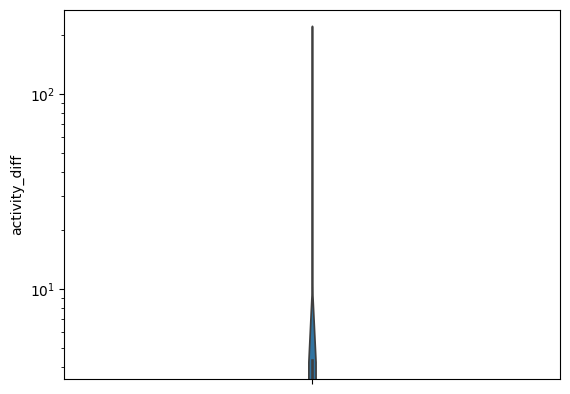

In [35]:
sns.violinplot(df.activity_diff)
plt.yscale("log")

In [81]:
df.head()

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD,abs_diff,ratio_CFD,ratio_activity,ratio_CFD_log2,ratio_activity_log2
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-3.230769,96.769231,0.934681,0.108236,-0.097454,-3.207752
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-17.622378,82.377622,0.643716,0.049956,-0.635505,-4.323194
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-29.822485,70.177515,0.397057,0.017420,-1.332582,-5.843132
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-6.057692,93.942308,0.877527,0.028134,-0.188484,-5.151562
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-20.769231,79.230769,0.580093,0.020018,-0.785643,-5.642592


In [19]:
def define_suprising_category(r):
    if abs(r.activity_diff)<10:
        return "Skip"
    if r.ratio_CFD_log2<=-2:
        if r.ratio_activity_log2<=-2:
            return "Captured_high_impact"
        elif    -2<r.ratio_activity_log2<2:
            return "Surprising_low_impact"
        else:
            return "Surprising_increase"
    else:
        if r.ratio_activity_log2<=-2:
            return "Surprising_high_impact"
        elif    -2<r.ratio_activity_log2<2:
            return "Captured_low_impact"
        else:
            return "Surprising_increase" 
df['suprising_category'] = df.swifter.apply(define_suprising_category,axis=1)

Pandas Apply:   0%|          | 0/5052996 [00:00<?, ?it/s]

In [20]:
df.ratio_activity_log2.describe()

count    5.052996e+06
mean    -7.236468e-01
std      9.448308e-01
min     -7.424908e+00
25%     -1.207113e+00
50%     -5.389062e-01
75%     -5.889734e-02
max      5.155138e+00
Name: ratio_activity_log2, dtype: float64

In [21]:
df.groupby(['site','suprising_category']).size()

site       suprising_category    
AAVS1.s14  Captured_high_impact        17150
           Captured_low_impact         47419
           Skip                      1257750
           Surprising_high_impact      68822
           Surprising_increase           644
           Surprising_low_impact        6313
CCR5.s8    Captured_high_impact         3536
           Captured_low_impact          3716
           Skip                       815377
           Surprising_high_impact       9468
           Surprising_increase            77
           Surprising_low_impact         419
CTLA4.s9   Captured_high_impact         8259
           Captured_low_impact          4388
           Skip                       680830
           Surprising_high_impact      26173
           Surprising_increase            17
           Surprising_low_impact         346
LAG3.s9    Captured_high_impact        10089
           Captured_low_impact         15353
           Skip                       935553
           Surprising

In [22]:
df_3 = df[df.MM<=3]

In [30]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import gzip as gz
import pysam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
from joblib import Parallel, delayed
import sys
import argparse
import plotly.express as px
import plotly.io as pio
import os
from Bio.Seq import Seq
from Bio import SeqIO
import swifter
import sys
import plotly.express as px
from Levenshtein import distance
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import scipy.stats as sts
import gzip as gz
import pysam
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
from joblib import Parallel, delayed
import sys
import argparse
import plotly.express as px
import plotly.io as pio
import os
from Bio.Seq import Seq
from Bio import SeqIO
import swifter
import sys
import plotly.express as px
from Levenshtein import distance
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
# import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
import svgwrite
pd.options.mode.chained_assignment = None  # Turns off the warning

boxWidth = 10
box_size = 15
v_spacing = 3

# colors = {'G': '#F5F500', 'A': '#FF5454', 'T': '#00D118', 'C': '#26A8FF', 'N': '#B3B3B3', 'R': '#B3B3B3', '-': '#FFFFFF'}
colors = {'G': '#F5F500', 'A': '#FF5454', 'T': '#00D118', 'C': '#26A8FF', 'N': '#B3B3B3', 'R': '#B3B3B3', '-': '#B3B3B3'}
for c in ['Y','S','W','K','M','B','D','H','V','.']:
    colors[c] = "#B3B3B3"

def find_PAM(seq,PAM):
    PAM_index=20
    return PAM_index   


def is_transition(base1, base2):
    """Check if the mismatch is a transition (purine ↔ purine or pyrimidine ↔ pyrimidine)."""
    purines = {'A', 'G'}
    pyrimidines = {'C', 'T'}
    return ((base1 in purines and base2 in purines) or
            (base1 in pyrimidines and base2 in pyrimidines))
def visualizeOfftargets_variant_effect(offtargets, target_seq, outfile, title, PAM):                       
    # Initiate canvas
    genome=None
    total_seq = len(offtargets)
    dwg = svgwrite.Drawing(outfile + '.svg', profile='full', size=(box_size*25+200, total_seq*(box_size + 1)*2+100))
    if title is not None:
        # Define top and left margins
        x_offset = 20
        y_offset = 50
        dwg.add(dwg.text(title, insert=(x_offset, 30), style="font-size:20px; font-family:Helvetica"))
    else:
        # Define top and left margins
        x_offset = 20
        y_offset = 20

    tick_locations = []
    tick_legend = []
    # PAM_index = target_seq.index(PAM)
    PAM_index = find_PAM(target_seq,PAM)
    count = 0
    for i in range(PAM_index,0,-1):
        count = count+1
        if count % 10 == 0:
            tick_legend.append(count)
            # print (count,i)
            tick_locations.append(i)
    if len(PAM)>=3:
        tick_legend+=['P', 'A', 'M']+['-']*(len(PAM)-3)
    else:
        tick_legend+=["PAM"]+['-']*(len(PAM)-3)
    tick_locations+=range(PAM_index+1,len(target_seq)+1)
    if PAM_index == 0:
        tick_legend = []
        tick_locations = []
        tick_legend+=['P', 'A', 'M']+['-']*(len(PAM)-3)
        tick_locations+=range(1,len(PAM)+1)
        count = 0
        for i in range(len(PAM)+1,len(target_seq)+1):
            count = count+1
            if count % 10 == 0 or count == 1:
                tick_legend.append(count)
                # print (count,i)
                tick_locations.append(i)
    # print (zip(tick_locations, tick_legend))
    for x,y in zip(tick_locations, tick_legend):
        dwg.add(dwg.text(y, insert=(x_offset + (x - 1) * box_size + 2, y_offset - 2), style="font-size:10px; font-family:Helvetica"))

    # Draw reference sequence row
    for i, c in enumerate(target_seq):
        y = y_offset
        x = x_offset + i * box_size
        dwg.add(dwg.rect((x, y), (box_size, box_size), fill=colors[c]))
        dwg.add(dwg.text(c, insert=(x + 3, y + box_size - 3), fill='black', style="font-size:15px; font-family:Helvetica"))

    dwg.add(dwg.text('Variant Effect', insert=(x_offset + box_size * len(target_seq) + 16, y_offset + box_size - 3), style="font-size:15px; font-family:Helvetica"))
    # dwg.add(dwg.text('Mismatches', insert=(box_size * (len(target_seq) + 1) + 150, y_offset + box_size - 3), style="font-size:15px; font-family:Helvetica"))
    # dwg.add(dwg.text('Coordinates', insert=(box_size * (len(target_seq) + 1) + 250, y_offset + box_size - 3), style="font-size:15px; font-family:Helvetica"))
    if genome!=None:
        dwg.add(dwg.text('Annotation', insert=(box_size * (len(target_seq) + 1) + 500, y_offset + box_size - 3), style="font-size:15px; font-family:Helvetica"))

    # Draw aligned sequence rows
    y_offset += 0  # leave some extra space after the reference row
    line_number = 0  # keep track of plotted sequences
                                        
    
                                        
    for j, seq in enumerate(offtargets):
        realigned_target_seq = offtargets[j]['realigned_target_seq']
        realigned_target_seq = list(realigned_target_seq)
        realigned_target_seq[-3]=="N"
        realigned_target_seq = "".join(realigned_target_seq)

        no_bulge_offtarget_sequence = offtargets[j]['seq']
        bulge_offtarget_sequence = offtargets[j]['bulged_seq']
        target_seq = offtargets[j]['target_seq']
        target_seq = list(target_seq)
        target_seq[-3]="N"
        # print (target_seq) 
        target_seq = "".join(target_seq)    
        # print (target_seq)    
        REF = offtargets[j]['REF']
        try:
            strand = offtargets[j]['strand']
        except:
            strand = "+"
        ALT = offtargets[j]['ALT']
        var_pos = offtargets[j]['var_pos']
                                          

        if no_bulge_offtarget_sequence != '':
            k = 0
            line_number += 2
            y = y_offset + line_number * box_size
            for i, (c, r) in enumerate(zip(no_bulge_offtarget_sequence, target_seq)):
                x = x_offset + k * box_size
                if var_pos == i+1:
                    # print (seq['coord'],i,var_pos)
                    if strand == "-":
                        REF = revcomp(REF)
                        ALT = revcomp(ALT)
                    tmp = box_size/2
                    # dwg.add(dwg.rect((x+1, tmp + y), (box_size, box_size*2), fill="grey",fill_opacity=0.2, stroke="black", stroke_width=1))
                    if r!=REF:
                        dwg.add(dwg.rect((x, 3 * tmp + y-box_size), (box_size, box_size), fill=colors[REF],fill_opacity=0.99))
                    dwg.add(dwg.text(REF, insert=(x + 3, 3 * tmp + y - 3), fill='black', style="font-size:15px; font-family:Helvetica"))
                    if r!=ALT:
                        dwg.add(dwg.rect((x, 5 * tmp + y-box_size), (box_size, box_size), fill=colors[ALT],fill_opacity=0.99))
                    dwg.add(dwg.text(ALT, insert=(x + 3, 5 * tmp + y - 3), fill='black', style="font-size:15px; font-family:Helvetica;font-weight:bold"))   

                if r == '-':
                    if 0 < k < len(target_seq):
                        x = x_offset + (k - 0.25) * box_size
                        dwg.add(dwg.rect((x, box_size * 1.4 + y), (box_size*0.6, box_size*0.6), fill=colors[c]))
                        dwg.add(dwg.text(c, insert=(x+1, 2 * box_size + y - 2), fill='black', style="font-size:10px; font-family:Helvetica"))
                elif c == r:
                    if var_pos != i+1:
                        # dwg.add(dwg.text(".", insert=(x + 4.5, 2 * box_size + y - 4), fill='black', style="font-size:20px; font-family:Helvetica;font-weight:bold"))
                        dwg.add(dwg.text(".", insert=(x + 5.5, 1.75 * box_size + y-3), fill='black', style="font-size:20px; font-family:Helvetica;font-weight:bold"))
                    k += 1
                elif r == 'N':
                    # dwg.add(dwg.text(c, insert=(x + 3, 2 * box_size + y - 3), fill='black', style="font-size:15px; font-family:Helvetica"))
                    dwg.add(dwg.text(".", insert=(x + 5.5, 1.75 * box_size + y-3), fill='black', style="font-size:20px; font-family:Helvetica;font-weight:bold"))
                    k += 1
                else:
                    if var_pos != i+1:
                        # if is_transition(r, c):
                        #     dwg.add(dwg.rect((x, box_size + y), (box_size, box_size), fill="#ce3bff"))
                        # else:
                        #     dwg.add(dwg.rect((x, box_size + y), (box_size, box_size), fill="#fa9d46"))
                        dwg.add(dwg.rect((x, box_size + y), (box_size, box_size), fill=colors[c]))
                    k += 1
        if bulge_offtarget_sequence != '':
            k = 0
            line_number += 2
            y = y_offset + line_number * box_size
            for i, (c, r) in enumerate(zip(bulge_offtarget_sequence, realigned_target_seq)):
                x = x_offset + k * box_size
                if var_pos == i+1:
                    # print (seq['coord'],i,var_pos)
                    if strand == "-":
                        REF = revcomp(REF)
                        ALT = revcomp(ALT)
                    tmp = box_size/2
                    # dwg.add(dwg.rect((x+1, tmp + y), (box_size, box_size*2), fill="grey",fill_opacity=0.2, stroke="black", stroke_width=1))
                    if r!=REF:
                        dwg.add(dwg.rect((x, 3 * tmp + y-box_size), (box_size, box_size), fill=colors[REF],fill_opacity=0.99))
                    dwg.add(dwg.text(REF, insert=(x + 3, 3 * tmp + y - 3), fill='black', style="font-size:15px; font-family:Helvetica;font-weight:bold"))
                    if r!=ALT:
                        dwg.add(dwg.rect((x, 5 * tmp + y-box_size), (box_size, box_size), fill=colors[ALT],fill_opacity=0.99))
                    dwg.add(dwg.text(ALT, insert=(x + 3, 5 * tmp + y - 3), fill='black', style="font-size:15px; font-family:Helvetica;font-weight:bold"))    

                if r == '-':
                    if 0 < k < len(realigned_target_seq):
                        x = x_offset + (k - 0.25) * box_size
                        dwg.add(dwg.rect((x, box_size * 1.4 + y), (box_size*0.6, box_size*0.6), fill=colors[c]))
                        dwg.add(dwg.text(c, insert=(x+1, 2 * box_size + y - 2), fill='black', style="font-size:10px; font-family:Helvetica"))
                elif c == r:
                    dwg.add(dwg.text(".", insert=(x + 5.5, 1.75 * box_size + y-3), fill='black', style="font-size:20px; font-family:Helvetica;font-weight:bold"))
                    k += 1
                elif r == 'N':
                    dwg.add(dwg.text(c, insert=(x + 3, 2 * box_size + y - 3), fill='black', style="font-size:15px; font-family:Helvetica"))
                    k += 1
                else:
                    if var_pos != i+1:
                        if is_transition(r, c):
                            dwg.add(dwg.rect((x, box_size + y), (box_size, box_size), fill="#ce3bff"))
                        else:
                            dwg.add(dwg.rect((x, box_size + y), (box_size, box_size), fill="#fa9d46"))
                    k += 1

        if no_bulge_offtarget_sequence == '' or bulge_offtarget_sequence == '':
            reads_text = dwg.text(seq['reads'], insert=(box_size * (len(target_seq) + 1) + 20, y_offset + box_size * (line_number + 2) - 2),
                                  fill='black', style="font-size:15px; font-family:Helvetica")
            dwg.add(reads_text)

            # Calculate the width of the horizontal bar based on read count
            # max_bar_width = 100  # Set a maximum width for the bar
            # bar_width = (seq['reads'] / 50) * max_bar_width  # Scale bar width by read count
            # bar_height = 20  # Fixed height for each horizontal bar

            # Position the bar beside the text
            # bar_x = box_size * (len(target_seq) + 1) + 50  # Adjust position to be beside the text
            # bar_y = y_offset + box_size * (line_number + 2)- bar_height

            # Draw the horizontal bar plot as a rectangle
            # bar = dwg.rect(
                # insert=(bar_x, bar_y),
                # size=(bar_width, bar_height),
                # fill="blue"
            # )
            # dwg.add(bar)


            if genome!= None:
                annot_text = dwg.text(seq['annot'], insert=(box_size * (len(target_seq) + 1) + 500, y_offset + box_size * (line_number + 2) - 2),
                                      fill='black', style="font-size:15px; font-family:Helvetica")
                dwg.add(annot_text)
        else:
            reads_text = dwg.text(str(seq['reads']), insert=(box_size * (len(target_seq) + 1) + 20, y_offset + box_size * (line_number + 1) + 5),
                                  fill='black', style="font-size:15px; font-family:Helvetica")
            dwg.add(reads_text)
            if genome!= None:
                annot_text = dwg.text(seq['annot'], insert=(box_size * (len(target_seq) + 1) + 500, y_offset + box_size * (line_number + 1) + 5),
                                      fill='black', style="font-size:15px; font-family:Helvetica")
                dwg.add(annot_text)
            reads_text02 = dwg.text(u"\u007D", insert=(box_size * (len(target_seq) + 1) + 7, y_offset + box_size * (line_number + 1) + 5),
                                  fill='black', style="font-size:23px; font-family:Helvetica")
            dwg.add(reads_text02)
    dwg.save()   
# offtargets=[r.to_dict() for i,r in low.sample(n=10).sort_values("reads",ascending=False).iterrows()]
# visualizeOfftargets_variant_effect(offtargets,"AGTGCTTGAGCCCATTTCCTNGG", f"CHANGEseqR.MM{s}", f"CHANGEseqR.MM{s}", "NGG")

In [45]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import gzip as gz
import pysam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
from joblib import Parallel, delayed
import sys
import argparse
import plotly.express as px
import plotly.io as pio
import os
from Bio.Seq import Seq
from Bio import SeqIO
import swifter
import sys
import plotly.express as px
from Levenshtein import distance
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import scipy.stats as sts
import gzip as gz
import pysam
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
from joblib import Parallel, delayed
import sys
import argparse
import plotly.express as px
import plotly.io as pio
import os
from Bio.Seq import Seq
from Bio import SeqIO
import swifter
import sys
import plotly.express as px
from Levenshtein import distance
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
# import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
import svgwrite
pd.options.mode.chained_assignment = None  # Turns off the warning

boxWidth = 10
box_size = 15
v_spacing = 3

# colors = {'G': '#F5F500', 'A': '#FF5454', 'T': '#00D118', 'C': '#26A8FF', 'N': '#B3B3B3', 'R': '#B3B3B3', '-': '#FFFFFF'}
colors = {'G': '#F5F500', 'A': '#FF5454', 'T': '#00D118', 'C': '#26A8FF', 'N': '#B3B3B3', 'R': '#B3B3B3', '-': '#B3B3B3'}
for c in ['Y','S','W','K','M','B','D','H','V','.']:
    colors[c] = "#B3B3B3"

def find_PAM(seq,PAM):
    PAM_index=20
    return PAM_index   


def is_transition(base1, base2):
    """Check if the mismatch is a transition (purine ↔ purine or pyrimidine ↔ pyrimidine)."""
    purines = {'A', 'G'}
    pyrimidines = {'C', 'T'}
    return ((base1 in purines and base2 in purines) or
            (base1 in pyrimidines and base2 in pyrimidines))
def visualizeOfftargets_seqvis_reads(offtargets, target_seq, outfile, title, PAM):                       
    # Initiate canvas
    genome=None
    total_seq = len(offtargets)
    dwg = svgwrite.Drawing(outfile + '.svg', profile='full', size=(box_size*25+200, total_seq*(box_size + 1)*2+100))
    if title is not None:
        # Define top and left margins
        x_offset = 20
        y_offset = 50
        dwg.add(dwg.text(title, insert=(x_offset, 30), style="font-size:20px; font-family:Courier"))
    else:
        # Define top and left margins
        x_offset = 20
        y_offset = 20

    tick_locations = []
    tick_legend = []
    # PAM_index = target_seq.index(PAM)
    PAM_index = find_PAM(target_seq,PAM)
    count = 0
    for i in range(PAM_index,0,-1):
        count = count+1
        if count % 10 == 0:
            tick_legend.append(count)
            # print (count,i)
            tick_locations.append(i)
    if len(PAM)>=3:
        tick_legend+=['P', 'A', 'M']+['-']*(len(PAM)-3)
    else:
        tick_legend+=["PAM"]+['-']*(len(PAM)-3)
    tick_locations+=range(PAM_index+1,len(target_seq)+1)
    if PAM_index == 0:
        tick_legend = []
        tick_locations = []
        tick_legend+=['P', 'A', 'M']+['-']*(len(PAM)-3)
        tick_locations+=range(1,len(PAM)+1)
        count = 0
        for i in range(len(PAM)+1,len(target_seq)+1):
            count = count+1
            if count % 10 == 0 or count == 1:
                tick_legend.append(count)
                # print (count,i)
                tick_locations.append(i)
    # print (zip(tick_locations, tick_legend))
    for x,y in zip(tick_locations, tick_legend):
        dwg.add(dwg.text(y, insert=(x_offset + (x - 1) * box_size + 2, y_offset - 2), style="font-size:10px; font-family:Courier"))

    # Draw reference sequence row
    for i, c in enumerate(target_seq):
        y = y_offset
        x = x_offset + i * box_size
        dwg.add(dwg.rect((x, y), (box_size, box_size), fill=colors[c]))
        dwg.add(dwg.text(c, insert=(x + 3, y + box_size - 3), fill='black', style="font-size:10px; font-family:Courier"))

    dwg.add(dwg.text('User given info', insert=(x_offset + box_size * len(target_seq) + 16, y_offset + box_size - 3), style="font-size:10px; font-family:Courier"))
    # dwg.add(dwg.text('Mismatches', insert=(box_size * (len(target_seq) + 1) + 150, y_offset + box_size - 3), style="font-size:10px; font-family:Courier"))
    # dwg.add(dwg.text('Coordinates', insert=(box_size * (len(target_seq) + 1) + 250, y_offset + box_size - 3), style="font-size:10px; font-family:Courier"))
    if genome!=None:
        dwg.add(dwg.text('Annotation', insert=(box_size * (len(target_seq) + 1) + 500, y_offset + box_size - 3), style="font-size:10px; font-family:Courier"))

    # Draw aligned sequence rows
    y_offset += 0  # leave some extra space after the reference row
    line_number = 0  # keep track of plotted sequences
                                        
    
                                        
    for j, seq in enumerate(offtargets):
        realigned_target_seq = offtargets[j]['realigned_target_seq']
        realigned_target_seq = list(realigned_target_seq)
        realigned_target_seq[-3]=="N"
        realigned_target_seq = "".join(realigned_target_seq)

        no_bulge_offtarget_sequence = offtargets[j]['seq']
        bulge_offtarget_sequence = offtargets[j]['bulged_seq']
        target_seq = offtargets[j]['target_seq']
        target_seq = list(target_seq)
        target_seq[-3]="N"
        # print (target_seq) 
        target_seq = "".join(target_seq)    
        # print (target_seq)    
        # REF = offtargets[j]['REF']
        # try:
        #     strand = offtargets[j]['strand']
        # except:
        #     strand = "+"
        # ALT = offtargets[j]['ALT']
        # var_pos = offtargets[j]['var_pos']
        var_pos=999                                  

        if no_bulge_offtarget_sequence != '':
            k = 0
            line_number += 1
            y = y_offset + line_number * box_size
            for i, (c, r) in enumerate(zip(no_bulge_offtarget_sequence, target_seq)):
                x = x_offset + k * box_size

                if r == '-':
                    if 0 < k < len(target_seq):
                        x = x_offset + (k - 0.25) * box_size
                        dwg.add(dwg.rect((x, box_size * 1.4 + y), (box_size*0.6, box_size*0.6), fill=colors[c]))
                        dwg.add(dwg.text(c, insert=(x+1, 2 * box_size + y - 2), fill='black', style="font-size:10px; font-family:Courier"))
                elif c == r:
                    dwg.add(dwg.text(".", insert=(x + 4.5, 2 * box_size + y - 4), fill='black', style="font-size:10px; font-family:Courier"))
                    k += 1
                elif r == 'N':
                    # dwg.add(dwg.text(c, insert=(x + 3, 2 * box_size + y - 3), fill='black', style="font-size:10px; font-family:Courier"))
                    dwg.add(dwg.text(c, insert=(x + 3, 2 * box_size + y - 3), fill='black', style="font-size:10px; font-family:Courier"))
                    k += 1
                else:
                    dwg.add(dwg.rect((x, box_size + y), (box_size, box_size), fill=colors[c]))
                    dwg.add(dwg.text(c, insert=(x+3, 2 * box_size + y - 3), fill='black', style="font-size:10px; font-family:Courier"))
                    k += 1
        if bulge_offtarget_sequence != '':
            k = 0
            line_number += 2
            y = y_offset + line_number * box_size
            for i, (c, r) in enumerate(zip(bulge_offtarget_sequence, realigned_target_seq)):
                x = x_offset + k * box_size

                if r == '-':
                    if 0 < k < len(realigned_target_seq):
                        x = x_offset + (k - 0.25) * box_size
                        dwg.add(dwg.rect((x, box_size * 1.4 + y), (box_size*0.6, box_size*0.6), fill=colors[c]))
                        dwg.add(dwg.text(c, insert=(x+1, 2 * box_size + y - 2), fill='black', style="font-size:10px; font-family:Courier"))
                elif c == r:
                    dwg.add(dwg.text(".", insert=(x + 4.5, 2 * box_size + y - 4), fill='black', style="font-size:10px; font-family:Courier"))
                    k += 1
                elif r == 'N':
                    dwg.add(dwg.text(c, insert=(x + 3, 2 * box_size + y - 3), fill='black', style="font-size:10px; font-family:Courier"))
                    k += 1
                else:
                    dwg.add(dwg.rect((x, box_size + y), (box_size, box_size), fill=colors[c]))
                    dwg.add(dwg.text(c, insert=(x+3, 2 * box_size + y - 3), fill='black', style="font-size:10px; font-family:Courier"))
                    k += 1

        if no_bulge_offtarget_sequence == '' or bulge_offtarget_sequence == '':
            reads_text = dwg.text(seq['reads'], insert=(box_size * (len(target_seq) + 1) + 20, y_offset + box_size * (line_number + 2) - 2),
                                  fill='black', style="font-size:10px; font-family:Courier")
            dwg.add(reads_text)


            if genome!= None:
                annot_text = dwg.text(seq['annot'], insert=(box_size * (len(target_seq) + 1) + 500, y_offset + box_size * (line_number + 2) - 2),
                                      fill='black', style="font-size:10px; font-family:Courier")
                dwg.add(annot_text)
        else:
            reads_text = dwg.text(str(seq['reads']), insert=(box_size * (len(target_seq) + 1) + 20, y_offset + box_size * (line_number + 1) + 5),
                                  fill='black', style="font-size:10px; font-family:Courier")
            dwg.add(reads_text)
            if genome!= None:
                annot_text = dwg.text(seq['annot'], insert=(box_size * (len(target_seq) + 1) + 500, y_offset + box_size * (line_number + 1) + 5),
                                      fill='black', style="font-size:10px; font-family:Courier")
                dwg.add(annot_text)
            reads_text02 = dwg.text(u"\u007D", insert=(box_size * (len(target_seq) + 1) + 7, y_offset + box_size * (line_number + 1) + 5),
                                  fill='black', style="font-size:23px; font-family:Courier")
            dwg.add(reads_text02)
    dwg.save()   
# offtargets=[r.to_dict() for i,r in low.sample(n=10).sort_values("reads",ascending=False).iterrows()]
# visualizeOfftargets_variant_effect(offtargets,"AGTGCTTGAGCCCATTTCCTNGG", f"CHANGEseqR.MM{s}", f"CHANGEseqR.MM{s}", "NGG")

In [ ]:
        # realigned_target_seq = offtargets[j]['realigned_target_seq']
        # no_bulge_offtarget_sequence = offtargets[j]['seq']
        # bulge_offtarget_sequence = offtargets[j]['bulged_seq']
        # target_seq = offtargets[j]['target_seq']
        # REF = offtargets[j]['REF']
        # ALT = offtargets[j]['ALT']
        # var_pos = offtargets[j]['var_pos']

In [32]:
for s,d in df_3.groupby(['site','MM','suprising_category']):
    d['reads'] = d.relative_activity_percent.astype(int).astype(str)+"_"+d.variant_relative_activity_percent.astype(int).astype(str)+"_"+d.delta_CFD.astype(int).astype(str)
    if d.shape[0]>20:
        offtargets=[r.to_dict() for i,r in d.sample(n=20).iterrows()]
    else:
        offtargets=[r.to_dict() for i,r in d.iterrows()]
    visualizeOfftargets_variant_effect(offtargets,d.target_seq.tolist()[0], f"{s[0]}.MM{s[1]}.{s[2]}", f"{s[0]}.MM{s[1]}.{s[2]}", "NGG")

In [46]:
visualizeOfftargets_seqvis_reads(offtargets,d.target_seq.tolist()[0],"test", "test", "NGG")

<Axes: xlabel='site', ylabel='percentage'>

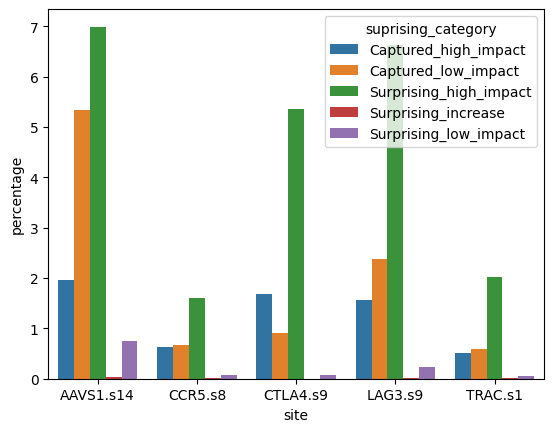

In [24]:
sns.barplot(data=merged[merged.suprising_category!="Skip"],hue="suprising_category",x="site",y="percentage")

<Axes: xlabel='site', ylabel='percentage'>

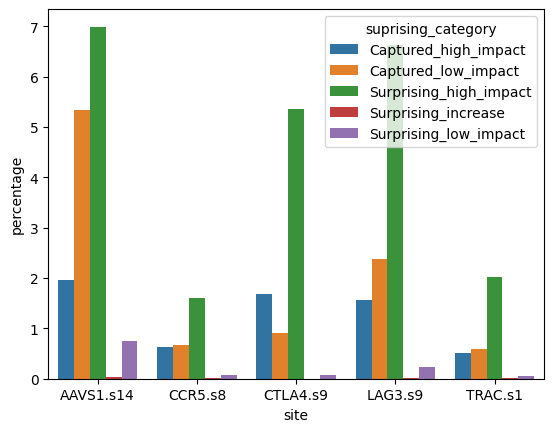

In [102]:
sns.barplot(data=merged[merged.suprising_category!="Skip"],hue="suprising_category",x="site",y="percentage")

In [106]:
merged.groupby("suprising_category").percentage.mean()

suprising_category
Captured_high_impact       1.274
Captured_low_impact        1.976
Skip                      91.984
Surprising_high_impact     4.518
Surprising_increase        0.014
Surprising_low_impact      0.236
Name: percentage, dtype: float64

In [110]:
from Bio import motifs
from Bio.Seq import Seq

In [114]:
import logomaker
def tologo(m,s,outfile,title):
    X=pd.DataFrame.from_dict(m.pwm,orient="index").T
    for i in range(len(s)):
        if s[i]=="N":
            continue
        X.at[i,s[i]]=0
    df_normalized = X.div(X.sum(axis=1), axis=0)
    logo = logomaker.Logo(df_normalized,
                              shade_below=.5,
                              fade_below=.5)

    # style using Logo methods
    logo.style_spines(visible=False)
    logo.style_spines(spines=['left', 'bottom'], visible=True)
    logo.style_xticks(rotation=90, fmt='%d', anchor=0)

    # style using Axes methods
    logo.ax.set_ylabel("MisMatch Frequency", labelpad=-1)
    logo.ax.xaxis.set_ticks_position('none')
    logo.ax.xaxis.set_tick_params(pad=-1)
    logo.ax.set_title(title)
    logo.ax.set_xticks(range(23))  # adjust the number based on your data
    logo.ax.set_xticklabels(list(s), rotation=0)
    plt.savefig(outfile,bbox_inches='tight')



In [33]:
df2.head()

NameError: name 'df2' is not defined

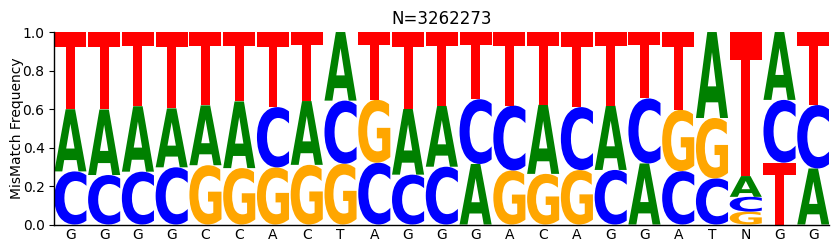

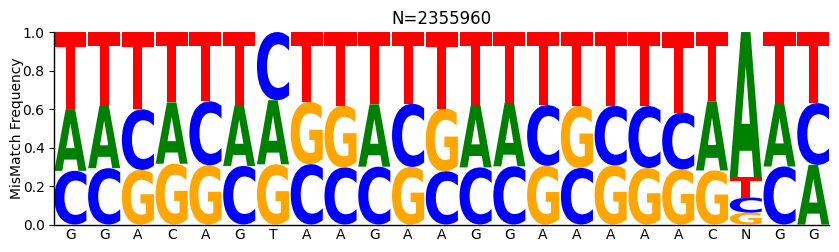

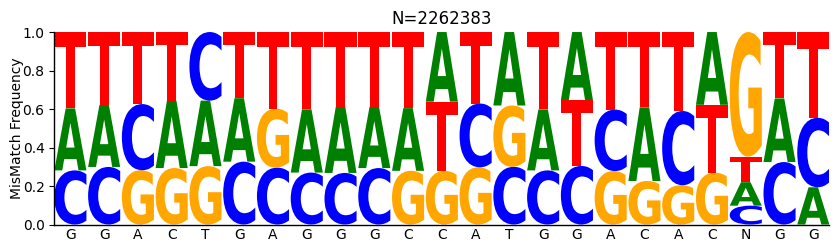

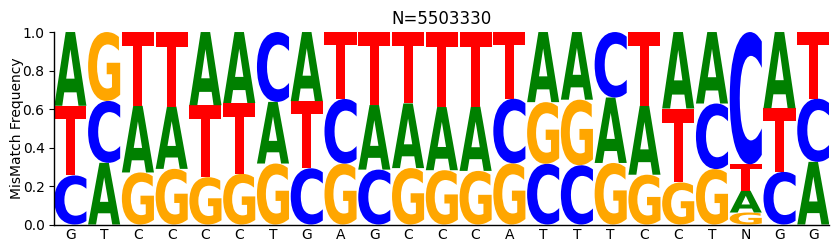

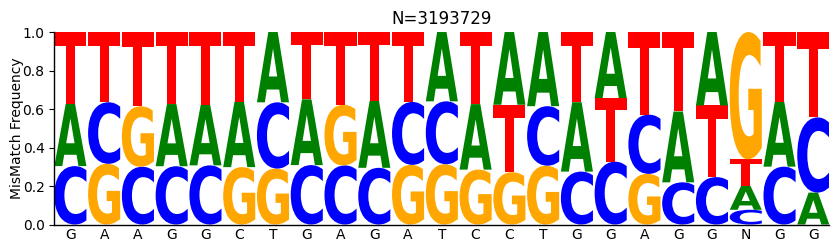

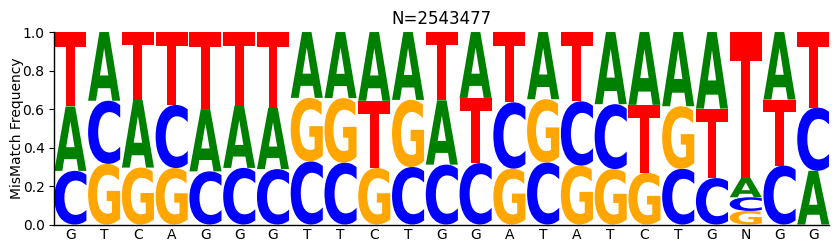

In [116]:
gRNA = {'AAVS1.s14': 'GGGGCCACTAGGGACAGGATNGG', 
        'CTLA4.s9': 'GGACTGAGGGCCATGGACACNGG',
        'TRAC.s1': 'GTCAGGGTTCTGGATATCTGNGG',
        'LAG3.s9': 'GAAGGCTGAGATCCTGGAGGNGG',
        'CXCR4.s8': 'GTCCCCTGAGCCCATTTCCTNGG',
        'CCR5.s8': 'GGACAGTAAGAAGGAAAAACNGG'}
for s,d in df2.groupby("site"):
    size=d.shape[0]
    seq=gRNA[s]
    d=d[d.control_target_seq.str.len()==23]
    m = motifs.create([Seq(x) for x in d['control_target_seq']])
    # m.weblogo(f"{s}.CHANGE-seq-R.png",logo_title=f"N={size}")
    # from IPython.display import Image
    # Image(f"{s}.CHANGE-seq-R.png")
    tologo(m,seq,f"{s}.CHANGE-seq-R.seqlogo.png",f"N={d.shape[0]}")

In [115]:
df2

,Unnamed: 0,site,MM,control_target_seq,Cas9_counts_rep1,Cas9_counts_rep2,Cas9_counts_scaled_rep1,Cas9_counts_scaled_rep2,control_counts_rep1,control_counts_rep2,control_counts_scaled_rep1,control_counts_scaled_rep2,log2FC_rep1,log2FC_rep2,delta_log2FC,FC_rep1,FC_rep2,average_log2FC,spacer,PAM,relative_activity_percent
0,8000,AAVS1.s14,3,AGAGCCACTAGGAACAGGATCGG,736.0,516.0,61.769835,65.073526,3.0,3.0,0.104740,0.104740,9.206384,9.281429,-0.075044,589.741982,621.283672,9.244394,AGAGCCACTAGGAACAGGAT,CGG,1291.337166
1,79968,AAVS1.s14,3,TCGACCACTAGGGACAGGATGGG,130.0,93.0,10.910433,11.728368,1.0,1.0,0.034913,0.034913,8.292318,8.396291,-0.103973,312.499148,335.926636,8.345241,TCGACCACTAGGGACAGGAT,GGG,691.427396
2,1606,AAVS1.s14,2,GGGACCACTAGGGACAGGATGGT,88.0,65.0,7.385524,8.197246,1.0,1.0,0.034913,0.034913,7.731576,7.881343,-0.149767,211.537885,234.787434,7.808402,GGGACCACTAGGGACAGGAT,GGT,475.924247
3,384446,AAVS1.s14,4,TCCGCCACTAGGGACAGCATTGG,81.0,69.0,6.798039,8.701692,1.0,1.0,0.034913,0.034913,7.612581,7.967145,-0.354564,194.711008,249.235892,7.800728,TCCGCCACTAGGGACAGCAT,TGG,473.388098
4,7583,AAVS1.s14,2,TGGGCCACTAAGGACAGGATAGG,145.0,89.0,12.169329,11.223922,2.0,2.0,0.069827,0.069827,7.453504,7.337525,0.115980,174.278371,160.739089,7.396680,TGGGCCACTAAGGACAGGAT,AGG,357.234792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19121147,19121147,TRAC.s1,21,TGACTAAGGAACCCGGAAACAAG,0.0,0.0,0.000000,0.000000,3.0,3.0,0.118482,0.118482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,TGACTAAGGAACCCGGAAAC,AAG,0.000000
19121148,19121148,TRAC.s1,21,TGACTAAGGGCGTTGGAAATGAC,0.0,0.0,0.000000,0.000000,1.0,1.0,0.039494,0.039494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,TGACTAAGGGCGTTGGAAAT,GAC,0.000000
19121149,19121149,TRAC.s1,21,TGAGCCTAAGATCTTGGAGAGTT,0.0,0.0,0.000000,0.000000,15.0,15.0,0.592411,0.592411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,TGAGCCTAAGATCTTGGAGA,GTT,0.000000
19121150,19121150,TRAC.s1,22,AGGCTTAGCGCCATGGAGATGTC,0.0,0.0,0.000000,0.000000,1.0,1.0,0.039494,0.039494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AGGCTTAGCGCCATGGAGAT,GTC,0.000000


In [111]:
for s,d in df2.groupby("site"):
    size=d.shape[0]
    d=d[d.control_target_seq.str.len()==23]
    m = motifs.create([Seq(x) for x in d['control_target_seq']])
    m.weblogo(f"{s}.CHANGE-seq-R.png",logo_title=f"N={size}")
    from IPython.display import Image
    Image(f"{s}.CHANGE-seq-R.png")

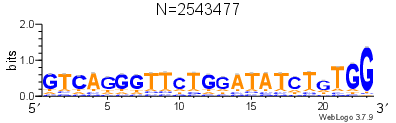

In [112]:
Image(f"{s}.CHANGE-seq-R.png")

In [23]:
# Group by site and surprising_category, then count
counts = df_3.groupby(['site', 'suprising_category']).size().reset_index(name='count')

# Get total per site
total_per_site = df_3.groupby('site').size().reset_index(name='total')

# Merge the counts with the totals
merged = counts.merge(total_per_site, on='site')

# Calculate the percentage
merged['percentage'] = merged['count'] / merged['total'] * 100

# Optional: format percentage to 2 decimal places
merged['percentage'] = merged['percentage'].round(2)
merged

,site,suprising_category,count,total,percentage
0,AAVS1.s14,Captured_high_impact,15567,793711,1.96
1,AAVS1.s14,Captured_low_impact,42342,793711,5.33
2,AAVS1.s14,Skip,674193,793711,84.94
3,AAVS1.s14,Surprising_high_impact,55450,793711,6.99
4,AAVS1.s14,Surprising_increase,321,793711,0.04
5,AAVS1.s14,Surprising_low_impact,5838,793711,0.74
6,CCR5.s8,Captured_high_impact,3315,527292,0.63
7,CCR5.s8,Captured_low_impact,3509,527292,0.67
8,CCR5.s8,Skip,511544,527292,97.01
9,CCR5.s8,Surprising_high_impact,8465,527292,1.61


In [83]:
df

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD,abs_diff,ratio_CFD,ratio_activity,ratio_CFD_log2,ratio_activity_log2
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-3.230769,96.769231,0.934681,0.108236,-0.097454,-3.207752
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-17.622378,82.377622,0.643716,0.049956,-0.635505,-4.323194
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-29.822485,70.177515,0.397057,0.017420,-1.332582,-5.843132
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-6.057692,93.942308,0.877527,0.028134,-0.188484,-5.151562
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-20.769231,79.230769,0.580093,0.020018,-0.785643,-5.642592


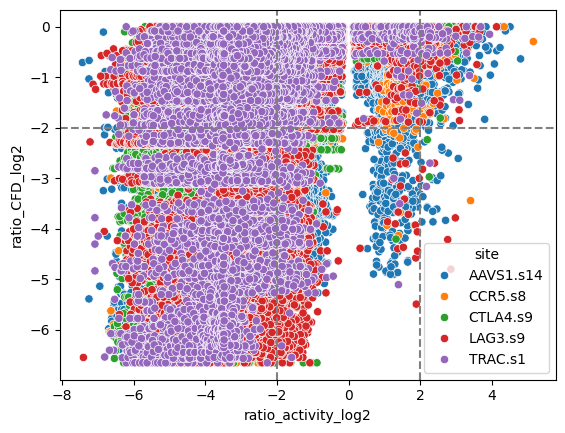

In [95]:
sns.scatterplot(data=df[df.activity_diff.abs()>=10][['ratio_activity_log2','ratio_CFD_log2','site']],x="ratio_activity_log2",y="ratio_CFD_log2",hue="site")
plt.axvline(x=2, color='grey', linestyle='--')
plt.axvline(x=-2, color='grey', linestyle='--')
plt.axhline(y=-2, color='grey', linestyle='--')


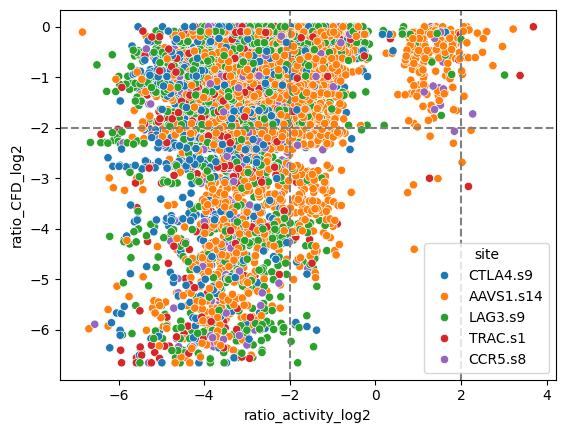

In [84]:
sns.scatterplot(data=df[df.activity_diff.abs()>=10][['ratio_activity_log2','ratio_CFD_log2','site']].sample(n=10000),x="ratio_activity_log2",y="ratio_CFD_log2",hue="site")
plt.axvline(x=2, color='grey', linestyle='--')
plt.axvline(x=-2, color='grey', linestyle='--')
plt.axhline(y=-2, color='grey', linestyle='--')


<Axes: xlabel='activity_diff', ylabel='delta_CFD'>

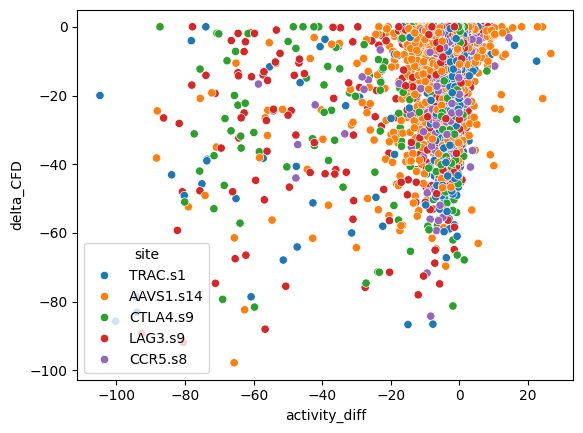

In [32]:
sns.scatterplot(data=df[['activity_diff','delta_CFD','site']].sample(n=10000),x="activity_diff",y="delta_CFD",hue="site")

In [34]:
f="/research_jude/rgs01_jude/groups/tsaigrp/projects/Genomics/common/users/Jackie/CHANGE-seq-R-analysis/20250303_Ashley_CXCR4_250224_VH00889_244_AAGCHCVM5_oldpipeline/results_log2FC/combined_scaled_log1p_df_pivot_activity_20250325.csv"
df2 = pd.read_csv(f)

In [18]:
df2.head()

,Unnamed: 0,site,MM,control_target_seq,Cas9_counts_rep1,Cas9_counts_rep2,Cas9_counts_scaled_rep1,Cas9_counts_scaled_rep2,control_counts_rep1,control_counts_rep2,control_counts_scaled_rep1,control_counts_scaled_rep2,log2FC_rep1,log2FC_rep2,delta_log2FC,FC_rep1,FC_rep2,average_log2FC,spacer,PAM,relative_activity_percent
0,8000,AAVS1.s14,3,AGAGCCACTAGGAACAGGATCGG,736.0,516.0,61.769835,65.073526,3.0,3.0,0.104740,0.104740,9.206384,9.281429,-0.075044,589.741982,621.283672,9.244394,AGAGCCACTAGGAACAGGAT,CGG,1291.337166
1,79968,AAVS1.s14,3,TCGACCACTAGGGACAGGATGGG,130.0,93.0,10.910433,11.728368,1.0,1.0,0.034913,0.034913,8.292318,8.396291,-0.103973,312.499148,335.926636,8.345241,TCGACCACTAGGGACAGGAT,GGG,691.427396
2,1606,AAVS1.s14,2,GGGACCACTAGGGACAGGATGGT,88.0,65.0,7.385524,8.197246,1.0,1.0,0.034913,0.034913,7.731576,7.881343,-0.149767,211.537885,234.787434,7.808402,GGGACCACTAGGGACAGGAT,GGT,475.924247
3,384446,AAVS1.s14,4,TCCGCCACTAGGGACAGCATTGG,81.0,69.0,6.798039,8.701692,1.0,1.0,0.034913,0.034913,7.612581,7.967145,-0.354564,194.711008,249.235892,7.800728,TCCGCCACTAGGGACAGCAT,TGG,473.388098
4,7583,AAVS1.s14,2,TGGGCCACTAAGGACAGGATAGG,145.0,89.0,12.169329,11.223922,2.0,2.0,0.069827,0.069827,7.453504,7.337525,0.115980,174.278371,160.739089,7.396680,TGGGCCACTAAGGACAGGAT,AGG,357.234792


In [22]:
df2.site.unique()

array(['AAVS1.s14', 'CCR5.s8', 'CTLA4.s9', 'CXCR4.s8', 'LAG3.s9',
       'TRAC.s1'], dtype=object)

In [24]:
df2[df2.site=="CTLA4.s9"].groupby("MM").control_counts_rep1.describe().head()

,count,mean,std,min,25%,50%,75%,max
MM,,,,,,,,
0,4.0,2627.500000,3734.267041,626.0,711.50,829.0,2745.00,8226.0
1,264.0,396.174242,543.041610,2.0,80.75,146.0,369.75,2521.0
2,7006.0,78.626463,105.057933,1.0,12.00,37.0,97.00,924.0
3,65819.0,23.703216,27.764936,1.0,5.00,14.0,33.00,377.0
4,222382.0,13.459646,15.672668,1.0,3.00,8.0,18.00,208.0


In [37]:
df3 = df[(df.activity_diff<=-50)|(df.activity_diff>=20)]

<Axes: xlabel='activity_diff', ylabel='delta_CFD'>

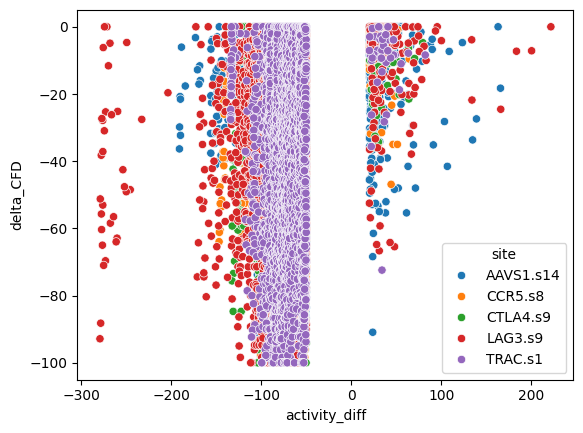

In [41]:
sns.scatterplot(data=df3,x="activity_diff",y="delta_CFD",hue="site")

In [42]:
df.head()

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-3.230769
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-17.622378
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-29.822485
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-6.057692
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-20.769231


In [52]:
def get_abs_diff(r):
    if r.activity_diff<=-100:
        change_seq_r_diff = -100
    else:
        change_seq_r_diff=r.activity_diff
    return r.delta_CFD-change_seq_r_diff
df['abs_diff'] = df.swifter.apply(get_abs_diff,axis=1)

Pandas Apply:   0%|          | 0/5052996 [00:00<?, ?it/s]

In [54]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

In [58]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

<Axes: xlabel='abs_diff', ylabel='delta_CFD'>

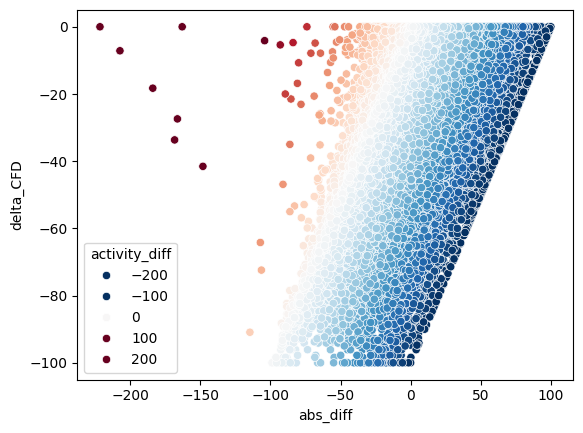

In [57]:
sns.scatterplot(data=df.sample(n=1000000),x="abs_diff",y="delta_CFD",hue="activity_diff",palette="RdBu_r",hue_norm=(-100,100))

<Axes: xlabel='abs_diff', ylabel='delta_CFD'>

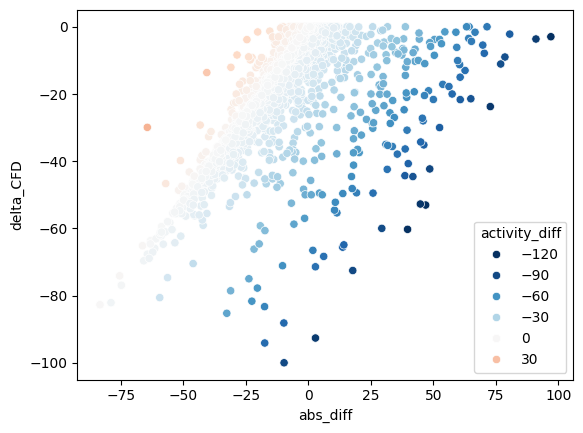

In [60]:
sns.scatterplot(data=df.sample(n=10000),x="abs_diff",y="delta_CFD",hue="activity_diff",palette="RdBu_r",hue_norm=(-100,100))

/lsf_tmp/248986378_1.tmpdir/ipykernel_1223482/864164568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.abs_diff)


<Axes: xlabel='abs_diff', ylabel='Density'>

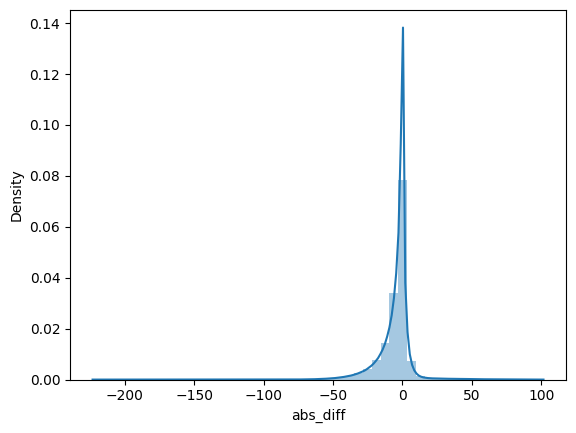

In [62]:
sns.distplot(df.abs_diff)

In [64]:
df[df.abs_diff<-50]

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD,abs_diff
190,AAVS1.s14,3,TTGGCCACTAGGGACAGGTTTGG,121.891716,TTGGCCACTAGGGACAAGTTTGG,170.838335,4,48.946619,1.401558,"[1, 2, 19]","[1, 2, 17, 19]",17,17,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,TTGGCCACTAGGGACAAGTTTGG,,48.946619,GGGGCCACTAGGGACAGGATNGG,TTGGCCACTAGGGACAGGTTTGG,-2.284382,-51.231001
491,AAVS1.s14,1,GGGGCCACTAGGGGCAGGATCGG,109.546162,GGGACCACTAGGGGCAGGATCGG,157.668336,2,48.122174,1.439287,[14],"[4, 14]",4,4,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGGCAGGATCGG,,48.122174,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGGCAGGATCGG,-4.666667,-52.788841
806,AAVS1.s14,1,GGGGCCACTAGGGACAGGTTCGG,105.462750,GGGACCACTAGGGACAGGTTCGG,193.097697,2,87.634947,1.830956,[19],"[4, 19]",4,4,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,,87.634947,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGTTCGG,-5.384615,-93.019562
807,AAVS1.s14,1,GGGGCCACTAGGGACAGGTTCGG,105.462750,GTGGCCACTAGGGACAGGTTCGG,150.083680,2,44.620930,1.423097,[19],"[2, 19]",2,2,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GTGGCCACTAGGGACAGGTTCGG,,44.620930,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGTTCGG,-19.580420,-64.201349
1135,AAVS1.s14,2,AGGGCCACTAGGGACAGGTTTGG,102.230726,AAGGCCACTAGGGACAGGTTTGG,150.553124,3,48.322398,1.472680,"[1, 19]","[1, 2, 19]",2,2,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,AAGGCCACTAGGGACAGGTTTGG,,48.322398,GGGGCCACTAGGGACAGGATNGG,AGGGCCACTAGGGACAGGTTTGG,-7.455621,-55.778019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13541717,TRAC.s1,5,GTAAGAATTCTGAATATCTATGG,0.000000,GTAAGAATTCTGAATGTCTATGG,0.104366,6,0.104366,inf,"[3, 6, 7, 13, 20]","[3, 6, 7, 13, 16, 20]",16,16,A,G,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTAAGAATTCTGAATGTCTATGG,,0.104366,GTCAGGGTTCTGGATATCTGNGG,GTAAGAATTCTGAATATCTATGG,-60.576923,-60.681289
13541725,TRAC.s1,5,GTAAGAATTCTGGATATTTATGG,0.000000,GTAAGAATTCTGGATTTTTATGG,0.000000,6,0.000000,NaN,"[3, 6, 7, 18, 20]","[3, 6, 7, 16, 18, 20]",16,16,A,T,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTAAGAATTCTGGATTTTTATGG,,0.000000,GTCAGGGTTCTGGATATCTGNGG,GTAAGAATTCTGGATATTTATGG,-52.232143,-52.232143
13549448,TRAC.s1,5,GTCAAACTTCTAGATATCTATGG,0.000000,GTCAAACTTCTAGAGATCTATGG,1.880659,6,1.880659,inf,"[5, 6, 7, 12, 20]","[5, 6, 7, 12, 15, 20]",15,15,T,G,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAAACTTCTAGAGATCTATGG,,1.880659,GTCAGGGTTCTGGATATCTGNGG,GTCAAACTTCTAGATATCTATGG,-49.528646,-51.409304
13549538,TRAC.s1,5,GTCAAAGGTCTGAATATCTATGG,0.000000,GTCAAAGGTCTGAATATCTATGT,0.000000,6,0.000000,NaN,"[5, 6, 8, 13, 20]","[5, 6, 8, 13, 20, 23]",23,23,G,T,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAAAGGTCTGAATATCTATGT,,0.000000,GTCAGGGTTCTGGATATCTGNGG,GTCAAAGGTCTGAATATCTATGG,-54.112903,-54.112903


In [63]:
df[df.abs_diff>50]

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD,abs_diff
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-3.230769,96.769231
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-17.622378,82.377622
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-29.822485,70.177515
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-6.057692,93.942308
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-20.769231,79.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764948,TRAC.s1,1,GTCAGGATTCTGGATATCTGAGG,55.040627,GTCAGGACTCTGGATATCTGAGG,4.909804,2,-50.130823,0.089203,[7],"[7, 8]",8,8,T,C,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAGGACTCTGGATATCTGAGG,,50.130823,GTCAGGGTTCTGGATATCTGNGG,GTCAGGATTCTGGATATCTGAGG,0.000000,50.130823
10764995,TRAC.s1,1,GGCAGGGTTCTGGATATCTGGGG,54.406738,GGCAGAGTTCTGGATATCTGGGG,3.994802,2,-50.411937,0.073425,[2],"[2, 6]",6,6,G,A,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GGCAGAGTTCTGGATATCTGGGG,,50.411937,GTCAGGGTTCTGGATATCTGNGG,GGCAGGGTTCTGGATATCTGGGG,0.000000,50.411937
10765049,TRAC.s1,1,GTCAAGGTTCTGGATATCTGAGG,54.077573,GTCAAAGTTCTGGATATCTGAGG,2.750119,2,-51.327454,0.050855,[5],"[5, 6]",6,6,G,A,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAAAGTTCTGGATATCTGAGG,,51.327454,GTCAGGGTTCTGGATATCTGNGG,GTCAAGGTTCTGGATATCTGAGG,0.000000,51.327454
10765254,TRAC.s1,1,GTCAAGGTTCTGGATATCTGGGG,53.848331,GTCAAAGTTCTGGATATCTGGGG,2.514930,2,-51.333401,0.046704,[5],"[5, 6]",6,6,G,A,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,GTCAAAGTTCTGGATATCTGGGG,,51.333401,GTCAGGGTTCTGGATATCTGNGG,GTCAAGGTTCTGGATATCTGGGG,0.000000,51.333401


In [25]:
df2[df2.site=="LAG3.s9"].groupby("MM").control_counts_rep1.describe().head()

,count,mean,std,min,25%,50%,75%,max
MM,,,,,,,,
0,4.0,2748.750000,3638.893639,445.0,936.25,1184.5,2997.00,8181.0
1,262.0,433.305344,515.572321,5.0,110.75,202.5,490.75,3042.0
2,7298.0,73.103453,92.585903,1.0,13.25,35.0,96.00,1041.0
3,74356.0,20.551052,22.955063,1.0,5.00,13.0,28.00,340.0
4,282869.0,10.850659,11.548069,1.0,3.00,7.0,15.00,151.0


In [36]:
df.head()

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD
7,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGAGACAGGTTCGG,20.008296,3,-173.089401,0.103617,"[4, 19]","[4, 12, 19]",12,12,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGAGACAGGTTCGG,,173.089401,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-3.230769
9,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGATCACTAGGGACAGGTTCGG,8.696374,3,-184.401323,0.045036,"[4, 19]","[4, 5, 19]",5,5,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGATCACTAGGGACAGGTTCGG,,184.401323,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-17.622378
10,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCACTAGTGACAGGTTCGG,2.381133,3,-190.716563,0.012331,"[4, 19]","[4, 12, 19]",12,12,G,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGTGACAGGTTCGG,,190.716563,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-29.822485
11,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGACCATTAGGGACAGGTTCGG,4.460667,3,-188.637030,0.023101,"[4, 19]","[4, 8, 19]",8,8,C,T,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCATTAGGGACAGGTTCGG,,188.637030,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-6.057692
12,AAVS1.s14,2,GGGACCACTAGGGACAGGTTCGG,193.097697,GGGAACACTAGGGACAGGTTCGG,2.885356,3,-190.212341,0.014942,"[4, 19]","[4, 5, 19]",5,5,C,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGAACACTAGGGACAGGTTCGG,,190.212341,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,-20.769231


In [66]:
df2[df2.control_target_seq=="TTGGCCACTAGGGACAGGTTTGG"]

,Unnamed: 0,site,MM,control_target_seq,Cas9_counts_rep1,Cas9_counts_rep2,Cas9_counts_scaled_rep1,Cas9_counts_scaled_rep2,control_counts_rep1,control_counts_rep2,control_counts_scaled_rep1,control_counts_scaled_rep2,log2FC_rep1,log2FC_rep2,delta_log2FC,FC_rep1,FC_rep2,average_log2FC,spacer,PAM,relative_activity_percent
63,83622,AAVS1.s14,3,TTGGCCACTAGGGACAGGTTTGG,1176.0,863.0,98.697454,108.83421,52.0,52.0,1.815501,1.815501,5.79087,5.929488,-0.138618,54.363757,59.947206,5.861843,TTGGCCACTAGGGACAGGTT,TGG,121.891716


In [65]:
df2[df2.control_target_seq=="TTGGCCACTAGGGACAAGTTTGG"]

,Unnamed: 0,site,MM,control_target_seq,Cas9_counts_rep1,Cas9_counts_rep2,Cas9_counts_scaled_rep1,Cas9_counts_scaled_rep2,control_counts_rep1,control_counts_rep2,control_counts_scaled_rep1,control_counts_scaled_rep2,log2FC_rep1,log2FC_rep2,delta_log2FC,FC_rep1,FC_rep2,average_log2FC,spacer,PAM,relative_activity_percent
21,406041,AAVS1.s14,4,TTGGCCACTAGGGACAAGTTTGG,176.0,149.0,14.771048,18.790611,6.0,6.0,0.209481,0.209481,6.160126,6.503044,-0.342918,70.512628,89.70084,6.34175,TTGGCCACTAGGGACAAGTT,TGG,170.838335


In [20]:
df2[df2.control_target_seq=="GAAGGTTGAGACCCTAGAGGAGG"]

,Unnamed: 0,site,MM,control_target_seq,Cas9_counts_rep1,Cas9_counts_rep2,Cas9_counts_scaled_rep1,Cas9_counts_scaled_rep2,control_counts_rep1,control_counts_rep2,control_counts_scaled_rep1,control_counts_scaled_rep2,log2FC_rep1,log2FC_rep2,delta_log2FC,FC_rep1,FC_rep2,average_log2FC,spacer,PAM,relative_activity_percent
13401809,13438688,LAG3.s9,3,GAAGGTTGAGACCCTAGAGGAGG,30.0,31.0,1.845778,1.740488,6.0,6.0,0.198311,0.198311,3.36562,3.289325,0.076295,9.307481,8.776546,3.327977,GAAGGTTGAGACCCTAGAGG,AGG,11.791731


In [27]:
df[df.activity_diff>0]

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD
190,AAVS1.s14,3,TTGGCCACTAGGGACAGGTTTGG,121.891716,TTGGCCACTAGGGACAAGTTTGG,170.838335,4,48.946619,1.401558,"[1, 2, 19]","[1, 2, 17, 19]",17,17,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,TTGGCCACTAGGGACAAGTTTGG,,48.946619,GGGGCCACTAGGGACAGGATNGG,TTGGCCACTAGGGACAGGTTTGG,-2.284382
350,AAVS1.s14,1,GGGGCCACTATGGACAGGATCGG,110.700418,AGGGCCACTATGGACAGGATCGG,131.758582,2,21.058165,1.190227,[11],"[1, 11]",1,1,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,AGGGCCACTATGGACAGGATCGG,,21.058165,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTATGGACAGGATCGG,-3.846154
491,AAVS1.s14,1,GGGGCCACTAGGGGCAGGATCGG,109.546162,GGGACCACTAGGGGCAGGATCGG,157.668336,2,48.122174,1.439287,[14],"[4, 14]",4,4,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGGCAGGATCGG,,48.122174,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGGCAGGATCGG,-4.666667
494,AAVS1.s14,1,GGGGCCACTAGGGGCAGGATCGG,109.546162,AGGGCCACTAGGGGCAGGATCGG,110.235641,2,0.689479,1.006294,[14],"[1, 14]",1,1,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,AGGGCCACTAGGGGCAGGATCGG,,0.689479,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGGCAGGATCGG,-4.666667
806,AAVS1.s14,1,GGGGCCACTAGGGACAGGTTCGG,105.462750,GGGACCACTAGGGACAGGTTCGG,193.097697,2,87.634947,1.830956,[19],"[4, 19]",4,4,G,A,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGATNGG,GGGACCACTAGGGACAGGTTCGG,,87.634947,GGGGCCACTAGGGACAGGATNGG,GGGGCCACTAGGGACAGGTTCGG,-5.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679294,TRAC.s1,5,TTTCGGGTTCTGGTTATCTATGG,0.000000,TCTCGGGTTCTGGTTATCTATGG,0.292225,6,0.292225,inf,"[1, 3, 4, 14, 20]","[1, 2, 3, 4, 14, 20]",2,2,T,C,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,TCTCGGGTTCTGGTTATCTATGG,,0.292225,GTCAGGGTTCTGGATATCTGNGG,TTTCGGGTTCTGGTTATCTATGG,-1.733193
13679308,TRAC.s1,5,TTTGAGGTTCAGGATATCTGTGG,0.000000,TTTGAGGTTCAGGATATCTGTCG,0.253855,6,0.253855,inf,"[1, 3, 4, 5, 11]","[1, 3, 4, 5, 11, 22]",22,22,G,C,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,TTTGAGGTTCAGGATATCTGTCG,,0.253855,GTCAGGGTTCTGGATATCTGNGG,TTTGAGGTTCAGGATATCTGTGG,-24.937221
13679339,TRAC.s1,5,TTTTGAGTTCTGGATTTCTGTGG,0.000000,TTTTGAGTTATGGATTTCTGTGG,0.075467,6,0.075467,inf,"[1, 3, 4, 6, 16]","[1, 3, 4, 6, 10, 16]",10,10,C,A,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,TTTTGAGTTATGGATTTCTGTGG,,0.075467,GTCAGGGTTCTGGATATCTGNGG,TTTTGAGTTCTGGATTTCTGTGG,0.000000
13679352,TRAC.s1,5,TTTTGGGTTCTGGATATTGGTGG,0.000000,TTTTGGGTTCTGTATATTGGTGG,0.058634,6,0.058634,inf,"[1, 3, 4, 18, 19]","[1, 3, 4, 13, 18, 19]",13,13,G,T,GTCAGGGTTCTGGATATCTGNGG,GTCAGGGTTCTGGATATCTGNGG,TTTTGGGTTCTGTATATTGGTGG,,0.058634,GTCAGGGTTCTGGATATCTGNGG,TTTTGGGTTCTGGATATTGGTGG,-4.921875


In [16]:
df[df.activity_diff<-200]

,site,MM,control_target_seq,relative_activity_percent,variant_seq,variant_relative_activity_percent,variant_MM,activity_diff,activity_ratio,mismatch_positions,variant_mismatch_positions,variant_position,var_pos,REF,ALT,target_seq,realigned_target_seq,seq,bulged_seq,reads,on_target,off,delta_CFD
8023465,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,GAAGGTTGAGACCCTAGAGGAGG,11.791731,3,-268.021737,0.042141,"[6, 16]","[6, 12, 16]",12,12,T,C,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGACCCTAGAGGAGG,,268.021737,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,-4.887218
8023467,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,GAAGGTAGAGATCCTAGAGGAGG,10.071949,3,-269.741518,0.035995,"[6, 16]","[6, 7, 16]",7,7,T,A,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTAGAGATCCTAGAGGAGG,,269.741518,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,-11.607143
8023468,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,TAAGGTTGAGATCCTAGAGGAGG,8.386182,3,-271.427285,0.029971,"[6, 16]","[1, 6, 16]",1,1,G,T,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,TAAGGTTGAGATCCTAGAGGAGG,,271.427285,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,0.000000
8023469,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,GAAGGTGGAGATCCTAGAGGAGG,2.095282,3,-277.718186,0.007488,"[6, 16]","[6, 7, 16]",7,7,T,G,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTGGAGATCCTAGAGGAGG,,277.718186,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,-38.235294
8023470,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,GTAGGTTGAGATCCTAGAGGAGG,6.969863,3,-272.843605,0.024909,"[6, 16]","[2, 6, 16]",2,2,A,T,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,GTAGGTTGAGATCCTAGAGGAGG,,272.843605,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,-25.324675
8023471,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,GAAGGTTGAGATCCTATAGGAGG,6.797364,3,-273.016104,0.024292,"[6, 16]","[6, 16, 17]",17,17,G,T,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTATAGGAGG,,273.016104,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,-69.642857
8023472,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,GAAGGTTAAGATCCTAGAGGAGG,5.726996,3,-274.086471,0.020467,"[6, 16]","[6, 8, 16]",8,8,G,A,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTAAGATCCTAGAGGAGG,,274.086471,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,0.000000
8023473,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,GAAGGTTGAGATCCTACAGGAGG,4.752846,3,-275.060621,0.016986,"[6, 16]","[6, 16, 17]",17,17,G,C,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTACAGGAGG,,275.060621,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,-71.008403
8023474,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,GAAGGTTGGGATCCTAGAGGAGG,5.527540,3,-274.285928,0.019754,"[6, 16]","[6, 9, 16]",9,9,A,G,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGGGATCCTAGAGGAGG,,274.285928,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,-30.952381
8023475,LAG3.s9,2,GAAGGTTGAGATCCTAGAGGAGG,279.813468,GAAGGTTGAGATCCTAAAGGAGG,4.310561,3,-275.502907,0.015405,"[6, 16]","[6, 16, 17]",17,17,G,A,GAAGGCTGAGATCCTGGAGGNGG,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAAAGGAGG,,275.502907,GAAGGCTGAGATCCTGGAGGNGG,GAAGGTTGAGATCCTAGAGGAGG,-6.190476


In [3]:
import pandas as pd

In [4]:
a = pd.read_csv("/home/yli11/dirs/MBNL1_Project_all_data_needed/yichao/bam_all/isoquant_bam_yli11_2025-04-09_b6e6d351c56d_isoQuant_isoseq_default_pacbio/OUT/40283.tsv",sep="\t",header=None)

In [5]:
a[5].unique()

array(['inconsistent_ambiguous', 'inconsistent', 'unique', 'ambiguous',
       'unique_minor_difference', 'inconsistent_non_intronic'],
      dtype=object)

In [119]:
for s,d in a.groupby(5):
    d[[0]].to_csv(f"/home/yli11/dirs/MBNL1_Project_all_data_needed/yichao/bam_all/ISOseq_bam/jj40283.{s}.list",index=False,header=False)

In [122]:
run_lsf.py -f bam.list --read_list BCL11A.ambiguous.read.list -p bam_read_list -j BCL11A.ambiguous.bam
run_lsf.py -f bam.list --read_list BCL11A.unique.read.list -p bam_read_list -j BCL11A.unique.bam


,0,1,2,3,4,5,6,7,8
0,a7cd1d6f-6220-4fe6-bd0b-1f5ab9086462,chr2,.,JingJing40283.chr2.nnic,ENSG00000119866.22,inconsistent_ambiguous,"extra_intron_novel:60339735-60460293,extra_int...","60188485-60188490,60188736-60188746,60339713-6...",gene_assignment=inconsistent; PolyA=False; Cla...
1,d3e05f8e-f3f4-420f-b8a6-879972ad1ec7,chr2,+,JingJing40283.chr2.nnic,ENSG00000119866.22,inconsistent_ambiguous,"extra_intron_novel:60266600-60460303,antisense","60266577-60266599,60460304-60460657",gene_assignment=inconsistent; PolyA=False; Cla...
2,be4383cd-e00a-4da8-b3c3-c98825936ee2,chr2,+,JingJing40283.chr2.nnic,ENSG00000119866.22,inconsistent_ambiguous,"extra_intron_5:60268655-60284735,extra_intron_...","60268649-60268654,60284736-60284743,60448376-6...",gene_assignment=inconsistent; PolyA=False; Cla...
3,b6c13913-70b6-4833-912b-574e5b200a6e,chr2,+,JingJing40283.chr2.nnic,ENSG00000119866.22,inconsistent_ambiguous,"extra_intron_novel:60273789-60460303,antisense","60273766-60273788,60460304-60460671",gene_assignment=inconsistent; PolyA=False; Cla...
4,39d36047-2077-4861-80b6-5d1387852cd7,chr2,+,JingJing40283.chr2.nnic,ENSG00000119866.22,inconsistent_ambiguous,"extra_intron_novel:60281594-60460362,antisense","60281576-60281593,60460363-60460671",gene_assignment=inconsistent; PolyA=False; Cla...


In [124]:
for s,d in a.groupby(5):
    print (s)
    print (d.sample(n=100)[6].unique())

ambiguous
['mono_exonic' 'ism_5' 'ism_3,tss_match:-11' 'ism_5,exon_elongation_5:3'
 'mono_exonic,antisense']
inconsistent
['terminal_exon_shift_known:60546301-60550867'
 'alternative_structure_novel:60468812-60553532'
 'alternative_structure_novel:60460366-60553937,tss_match_precise:0,correct_polya_site_left:60458603,antisense'
 'alternative_structure_novel:60460390-60553524,tss_match_precise:0,correct_polya_site_left:60458603,antisense'
 'alternative_structure_novel:60468834-60490508,tes_match_precise:0,correct_polya_site_left:60458603'
 'exon_gain_novel:60468834-60469801,60469865-60538380,tss_match:-3'
 'alternative_structure_novel:60461289-60553537,antisense'
 'terminal_exon_shift_known:60546301-60550867,exon_elongation_3:3'
 'extra_intron_novel:60461400-60461742,terminal_exon_shift_known:60546301-60550867'
 'terminal_exon_shift_known:60546301-60552497'
 'terminal_exon_shift_known:60546301-60552497,exon_elongation_3:4'
 'alternative_structure_novel:60460390-60553516,alternative_poly

In [ ]:
mono_exonic